#### Importing Libraries

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Data importation and Exploration 

In [116]:
#Loading the data from csv to into a dataframe.

In [117]:
df = pd.read_csv('USA_Housing.csv')

In [118]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [119]:
#shape of dataframe  

In [120]:
df.shape


(5000, 7)

In [121]:
#info on the dataframe

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [123]:
#checking  for missing entries in the dataset 

In [124]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [125]:
#Price distribution  

C:\Users\Tapiwanashe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


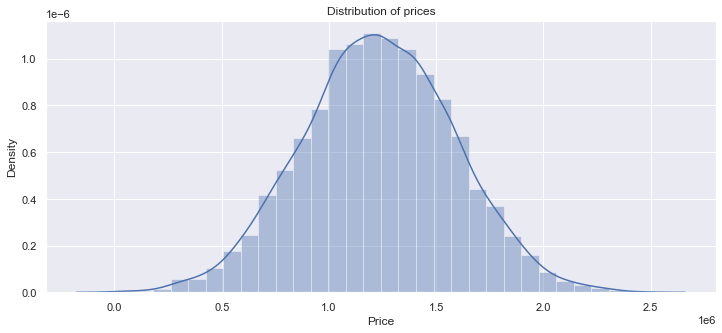

In [126]:

plt.figure(figsize =(12,5), )
sns.distplot(df['Price'],bins = 30)
plt.title('Distribution of prices')
plt.show()

In [127]:
#Heatmap showing correlations of attributes to each other

In [128]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


Text(0.5, 1.0, 'Heatmap  showing correlations of features')

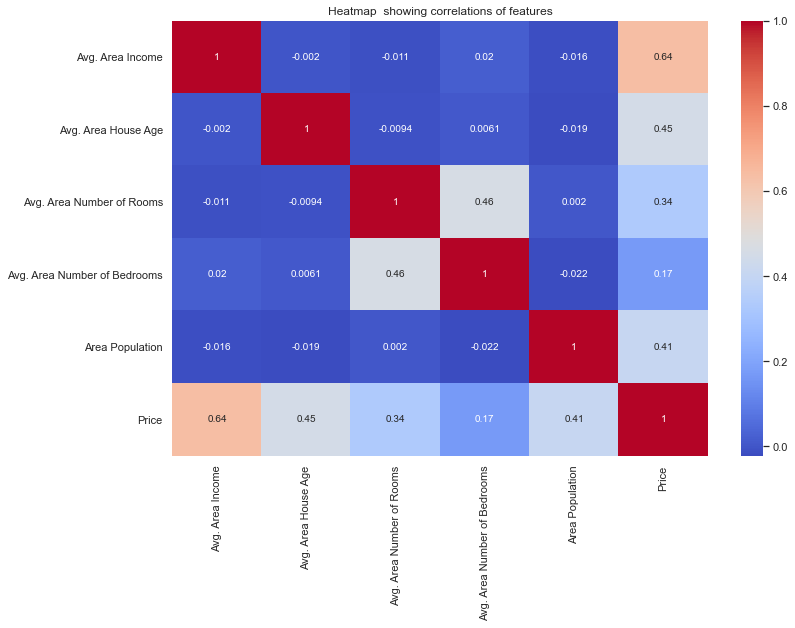

In [129]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')
plt.title('Heatmap  showing correlations of features')

#### Separating train and test data

In [130]:
#importing Libraries

In [131]:
from sklearn.model_selection import train_test_split  #importation of train test split from sklearn.model_selection 
from sklearn.linear_model import LinearRegression #importation of Linear regression module 

In [132]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [133]:
X= df [['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [134]:
y=df['Price']

In [135]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=101)

In [136]:
X.shape ,X_train.shape, X_test.shape

((5000, 5), (3000, 5), (2000, 5))

#### Training the model

#### Linear Regression 

In [137]:
lm = LinearRegression() # creating  Linear resgression model object 

In [138]:
lm.fit(X_train,y_train)

LinearRegression()

#### Model evaluation 

In [139]:
#train data 

In [140]:
train_prediction = lm.predict(X_train)

In [141]:
r2_train = metrics.r2_score(y_train,train_prediction)
print('R squared for training sample is:', r2_train)

R squared for training sample is: 0.9181223200568411


In [142]:
#test data 

In [143]:
test_prediction = lm.predict(X_test)

In [144]:
r2_test  = metrics.r2_score(y_test,test_prediction)
print ('R squared for testing sample is:', r2_test)

R squared for testing sample is: 0.9176824009649244


#### Checking if our model runs and predicts 

In [145]:
#input data to be tested
input_data = (70829.57800838354,6.832192294922779,6.149040327498629,3.3,49360.09429265137)

#change input data into an array 
input_data_as_array =np.asarray(input_data)

#reshape array 
input_data_reshaped =input_data_as_array.reshape(1,-1)

#predicting...
prediction  = lm.predict(input_data_reshaped)
print(prediction)
print ('The predicted price of house is:', prediction[0])



[1518840.80428432]
The predicted price of house is: 1518840.8042843197


#### Error calculations 

In [146]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 82288.22251914944
MSE: 10460958907.208952
RMSE: 102278.82922290884
